In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_daily_returns = pd.read_excel("/content/daily_returns.xlsx")
df_stock_categories = pd.read_excel("/content/stock_categories.xlsx")

In [ ]:
df_daily_returns.head(10)

,Date,HDFCBANK,ICICIBANK,SBIN,TCS,INFY,HCLTECH,BAJAJ-AUTO,M&M,MARUTI,...,HINDALCO,LT,ULTRACEMCO,ADANIPORTS,BHARTIARTL,TATACOMM,INDUSTOWER,TITAN,DMART,TRENT
0,2023-02-02,-1.4869,1.1734,0.1422,1.5271,2.1049,1.5458,-0.5405,0.0259,1.1552,...,-0.5237,-0.0303,0.3676,-6.6041,1.1247,0.9439,-1.1777,-1.6113,-1.3643,-0.4441
1,2023-02-03,3.4584,0.6877,3.0487,0.6329,0.9882,-0.3001,1.6316,2.6324,0.8134,...,-1.2355,1.0094,0.3007,7.8711,1.9479,1.0463,0.7010,6.7155,-0.9292,2.0692
2,2023-02-06,-0.4250,-1.1692,0.2205,-0.6418,-1.8476,-0.0392,-0.0896,-0.8646,-0.3836,...,-2.6760,-0.4823,-0.8617,9.3415,-0.4603,2.5724,12.8089,-0.2071,-0.8313,-0.4492
3,2023-02-07,0.1483,-0.1113,0.3117,0.3642,-0.4746,-1.5231,0.7885,-0.6759,-1.6339,...,-3.9790,0.4267,-0.7780,1.4117,-0.4245,-1.9475,-1.0491,-0.4516,-0.0174,-1.3779
4,2023-02-08,-0.0121,0.7446,0.4844,1.3693,1.7985,1.4846,0.0219,0.4646,0.8246,...,1.6180,-1.5910,2.5248,8.3341,-1.3742,0.9039,0.4054,0.8112,0.5144,1.8876
5,2023-02-09,-0.2086,0.1979,0.1910,0.5895,1.6661,0.1179,-0.8904,-0.0619,-0.3792,...,1.8442,0.7767,-0.9737,-2.8285,-1.0902,-0.8195,-0.9938,-0.1703,0.6780,8.5636
6,2023-02-10,0.3968,-0.8074,0.4085,-0.0932,-0.5226,-2.6780,-0.3666,-0.4919,0.1153,...,-2.5644,0.7660,0.3663,0.2834,0.6913,-0.1053,5.3952,0.2416,0.4825,-0.9762
7,2023-02-13,0.0754,-0.3748,-2.8117,-1.5590,-2.5551,-0.2375,1.3532,-0.9118,-0.0216,...,-1.2582,1.8231,-0.3719,-5.1802,-0.4340,-0.9163,-1.9941,2.0478,-0.1043,-1.6820
8,2023-02-14,0.9256,1.7222,0.6233,0.5083,1.6460,1.1186,-0.1906,0.7502,-0.3973,...,1.6600,-0.5288,-0.5579,2.0589,0.8587,1.3094,1.7309,-0.4823,-0.3576,1.0831
9,2023-02-15,-0.2031,0.6356,0.2588,0.5871,0.2385,0.6620,0.7559,1.1884,0.8080,...,-0.1955,-0.7574,0.1772,0.6990,1.3158,0.6099,1.3134,0.6941,1.8061,2.0332


In [ ]:
df_daily_returns.tail(10)

,Date,HDFCBANK,ICICIBANK,SBIN,TCS,INFY,HCLTECH,BAJAJ-AUTO,M&M,MARUTI,...,HINDALCO,LT,ULTRACEMCO,ADANIPORTS,BHARTIARTL,TATACOMM,INDUSTOWER,TITAN,DMART,TRENT
729,2026-01-16,0.6105,-0.5358,1.3565,2.2708,5.6257,2.5053,-0.9447,0.2384,-1.8140,...,-2.1667,-0.2432,1.0037,-0.5664,-0.3016,0.0570,-1.0379,-0.5827,-1.4255,-0.8265
730,2026-01-19,-0.3437,-2.1406,-0.3742,-1.3441,-0.5089,1.1072,-0.6270,-0.0219,1.9989,...,0.5671,0.3475,-0.6544,-1.3292,-0.3174,0.4217,-1.2562,-1.2581,-0.2384,1.1770
731,2026-01-20,0.3556,-0.3477,-0.1926,-1.9377,-1.3264,-1.7183,-2.6460,-2.7314,-1.8361,...,-1.2607,-1.5324,-1.9354,-2.5232,-0.6965,-2.8263,-3.2330,-1.6554,-2.7902,-2.7752
732,2026-01-21,-1.1652,-1.9480,-0.7478,0.6544,-0.2713,-0.2845,-0.0109,-0.1181,-0.6864,...,1.1960,-1.1547,1.4263,0.8043,0.0050,-5.5134,-0.1327,0.0908,-0.1338,-1.8691
733,2026-01-22,-0.1793,-0.2595,1.9151,0.8903,0.5500,1.2244,2.0808,0.5741,-0.0317,...,0.5590,0.7248,1.0874,2.5823,0.3056,-4.3207,1.2560,-1.4856,1.8432,1.0467
734,2026-01-23,-0.2830,-0.1561,-1.7981,0.3841,0.4388,0.2290,0.4642,-0.8479,-1.8776,...,0.6194,-1.3179,0.0404,-7.4813,-0.8740,0.7946,-1.4432,0.0796,-1.5708,-1.2593
735,2026-01-27,1.1243,1.3399,2.2972,-0.1423,0.7122,0.7733,0.8339,-4.2304,-1.4481,...,1.2154,1.1753,1.7786,4.2418,-0.5694,-0.2564,2.2752,-0.6166,0.1364,1.0437
736,2026-01-28,0.6801,0.4628,0.9828,1.3331,-0.9627,0.5464,-0.6163,1.6414,-2.4139,...,3.7792,0.1637,1.4139,1.3197,-0.7956,-1.7221,0.6508,-0.5454,1.7735,1.8155
737,2026-01-29,0.3002,1.1625,0.2539,-1.7406,-0.4200,-0.4625,0.8321,-1.8787,-2.5207,...,2.5897,3.6610,-0.3916,2.5979,0.5210,-0.0523,3.8208,-0.8930,-1.8337,-1.0404
738,2026-01-30,-0.6681,-2.0671,1.0270,-0.6520,-1.1148,-1.5102,0.8989,1.4005,0.6689,...,-6.0007,-0.0153,-0.1809,0.1411,0.0406,2.7411,0.6228,0.9569,0.6081,-1.0016


In [ ]:
df_daily_returns.columns

Index(['Date', 'HDFCBANK', 'ICICIBANK', 'SBIN', 'TCS', 'INFY', 'HCLTECH',
       'BAJAJ-AUTO', 'M&M', 'MARUTI', 'HINDUNILVR', 'ITC', 'NESTLEIND',
       'RELIANCE', 'NTPC', 'POWERGRID', 'SUNPHARMA', 'DRREDDY', 'CIPLA',
       'JSWSTEEL', 'TATASTEEL', 'HINDALCO', 'LT', 'ULTRACEMCO', 'ADANIPORTS',
       'BHARTIARTL', 'TATACOMM', 'INDUSTOWER', 'TITAN', 'DMART', 'TRENT'],
      dtype='object')

In [ ]:
df_stock_categories

,Category,Symbol,Company Name
0,Banking & Finance,HDFCBANK,HDFC Bank
1,Banking & Finance,ICICIBANK,ICICI Bank
2,Banking & Finance,SBIN,State Bank of India
3,Information Tech,TCS,TCS
4,Information Tech,INFY,Infosys
5,Information Tech,HCLTECH,HCL Tech
6,Automobiles,BAJAJ-AUTO,Bajaj Auto
7,Automobiles,M&M,Mahindra & Mahindra
8,Automobiles,MARUTI,Maruti Suzuki
9,Consumer Goods,HINDUNILVR,Hindustan Unilever


In [ ]:
df_stock_categories.shape

(30, 3)

In [ ]:
df_daily_returns.shape

(739, 31)

In [ ]:
print(df_daily_returns.iloc[:,1:].corr())

            HDFCBANK  ICICIBANK      SBIN       TCS      INFY   HCLTECH  \
HDFCBANK    1.000000   0.442166  0.354503  0.134624  0.187362  0.135354   
ICICIBANK   0.442166   1.000000  0.433852  0.181925  0.217176  0.169792   
SBIN        0.354503   0.433852  1.000000  0.188948  0.154046  0.182711   
TCS         0.134624   0.181925  0.188948  1.000000  0.698949  0.650787   
INFY        0.187362   0.217176  0.154046  0.698949  1.000000  0.672169   
HCLTECH     0.135354   0.169792  0.182711  0.650787  0.672169  1.000000   
BAJAJ-AUTO  0.190262   0.191910  0.192694  0.113396  0.114237  0.189090   
M&M         0.301233   0.309102  0.299909  0.219677  0.261979  0.203600   
MARUTI      0.183162   0.202876  0.237000  0.158746  0.136105  0.174924   
HINDUNILVR  0.097696   0.066014  0.020666  0.176033  0.178341  0.182383   
ITC         0.139724   0.214555  0.205476  0.148840  0.122615  0.160437   
NESTLEIND   0.091261   0.152026  0.109625  0.192460  0.110555  0.179454   
RELIANCE    0.363864   0.

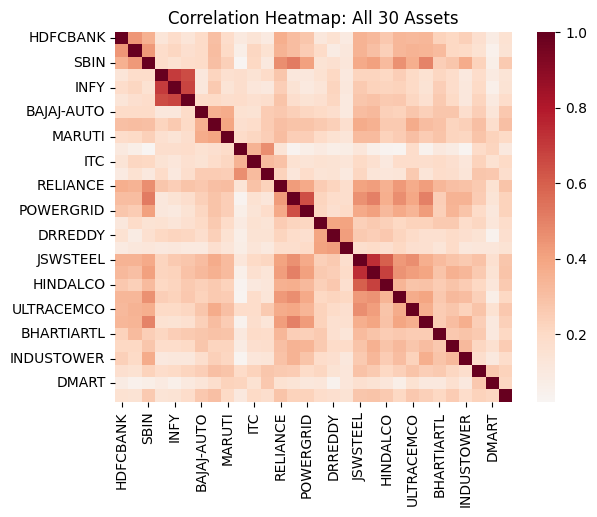

In [ ]:
sns.heatmap(df_daily_returns.iloc[:,1:].corr(), annot=False, cmap='RdBu_r', center=0)
plt.title("Correlation Heatmap: All 30 Assets")
plt.show()

In [ ]:
returns = pd.read_excel("daily_returns.xlsx", index_col=0)

# Stock category file
stock_info = pd.read_excel("stock_categories.xlsx")

# --------------------------------------------
# Step 2: Clean stock symbols
# --------------------------------------------

# Clean returns column names
returns.columns = returns.columns.str.strip().str.upper()

# Clean Symbol column in stock info
stock_info["Symbol"] = stock_info["Symbol"].str.strip().str.upper()

# --------------------------------------------
# Step 3: Correlation matrix
# --------------------------------------------

corr_matrix = returns.corr()

# --------------------------------------------
# Step 4: Select 10 stocks with low correlation
# --------------------------------------------

# Start with stock having lowest average correlation
avg_corr = corr_matrix.mean()
selected_stocks = [avg_corr.idxmin()]

# Add stocks one by one to keep correlation low
while len(selected_stocks) < 10:
    remaining = [s for s in corr_matrix.columns if s not in selected_stocks]

    avg_corr_with_selected = {
        stock: corr_matrix.loc[stock, selected_stocks].mean()
        for stock in remaining
    }

    next_stock = min(avg_corr_with_selected, key=avg_corr_with_selected.get)
    selected_stocks.append(next_stock)

# --------------------------------------------
# Step 5: Attach sector (Category)
# --------------------------------------------

selected_df = pd.DataFrame({"Symbol": selected_stocks})

final_selection = selected_df.merge(
    stock_info[["Symbol", "Category"]],
    on="Symbol",
    how="left"
)

final_selection.columns = ["Stock", "Sector"]

# --------------------------------------------
# Step 6: Output
# --------------------------------------------

print("\nFinal 10-Stock Portfolio with Sectors:\n")
print(final_selection)

# --------------------------------------------
# Step 7: Safety check
# --------------------------------------------

missing = final_selection[final_selection["Sector"].isna()]
if not missing.empty:
    print("\n⚠ Missing sector for these stocks:")
    print(missing)


Final 10-Stock Portfolio with Sectors:

        Stock              Sector
0  HINDUNILVR      Consumer Goods
1        SBIN   Banking & Finance
2       CIPLA     Pharmaceuticals
3       DMART   Retail/E-commerce
4        INFY    Information Tech
5  BAJAJ-AUTO         Automobiles
6  INDUSTOWER  Telecommunications
7         ITC      Consumer Goods
8    HDFCBANK   Banking & Finance
9   SUNPHARMA     Pharmaceuticals


In [ ]:
stocks_picked = final_selection['Stock']
df = df_daily_returns[stocks_picked]
df

,HINDUNILVR,SBIN,CIPLA,DMART,INFY,BAJAJ-AUTO,INDUSTOWER,ITC,HDFCBANK,SUNPHARMA
0,2.3541,0.1422,-0.6540,-1.3643,2.1049,-0.5405,-1.1777,4.7593,-1.4869,-0.7193
1,0.5276,3.0487,-0.2926,-0.9292,0.9882,1.6316,0.7010,0.5415,3.4584,2.0395
2,-0.4209,0.2205,0.7337,-0.8313,-1.8476,-0.0896,12.8089,0.7225,-0.4250,-0.4669
3,-1.3801,0.3117,0.1457,-0.0174,-0.4746,0.7885,-1.0491,-2.6474,0.1483,-1.6563
4,-0.7074,0.4844,0.7563,0.5144,1.7985,0.0219,0.4054,0.6162,-0.0121,1.4115
...,...,...,...,...,...,...,...,...,...,...
734,0.7906,-1.7981,-4.0426,-1.5708,0.4388,0.4642,-1.4432,-0.4464,-0.2830,-0.1407
735,-0.3569,2.2972,-0.1521,0.1364,0.7122,0.8339,2.2752,-1.4688,1.1243,0.4289
736,-0.9371,0.9828,1.1729,1.7735,-0.9627,-0.6163,0.6508,0.7846,0.6801,-1.7268
737,-1.0848,0.2539,-0.5646,-1.8337,-0.4200,0.8321,3.8208,-0.7940,0.3002,-1.3225


In [ ]:
mean_daily_return = df.mean()
cov_matrix = df.cov()

In [ ]:
cov_matrix

,HINDUNILVR,SBIN,CIPLA,DMART,INFY,BAJAJ-AUTO,INDUSTOWER,ITC,HDFCBANK,SUNPHARMA
HINDUNILVR,1.318635,0.034044,0.125264,0.412766,0.308129,0.268158,0.081250,0.461832,0.129519,0.122799
SBIN,0.034044,2.058069,0.258630,0.151720,0.332507,0.425742,1.202439,0.339570,0.587144,0.249644
CIPLA,0.125264,0.258630,2.084467,0.292144,0.251131,0.221638,0.370863,0.219626,0.143018,0.674842
DMART,0.412766,0.151720,0.292144,2.627667,0.140246,0.330523,0.391054,0.289910,0.159140,0.237580
INFY,0.308129,0.332507,0.251131,0.140246,2.263808,0.264713,0.388997,0.212522,0.325458,0.237396
BAJAJ-AUTO,0.268158,0.425742,0.221638,0.330523,0.264713,2.371898,0.620587,0.262262,0.338294,0.366540
INDUSTOWER,0.081250,1.202439,0.370863,0.391054,0.388997,0.620587,5.055236,0.313154,0.612983,0.491961
ITC,0.461832,0.339570,0.219626,0.289910,0.212522,0.262262,0.313154,1.327018,0.185826,0.211848
HDFCBANK,0.129519,0.587144,0.143018,0.159140,0.325458,0.338294,0.612983,0.185826,1.332873,0.156604
SUNPHARMA,0.122799,0.249644,0.674842,0.237580,0.237396,0.366540,0.491961,0.211848,0.156604,1.362323


In [ ]:
RISK_FREE_RATE = 0.065
TRADING_DAYS = 252

results_return = []
results_volatility = []
results_sharpe_ratio = []
all_weights = []

np.random.seed(42)

for _ in range(20_000):
  weights = np.random.random(10)
  weights = weights / np.sum(weights)
  all_weights.append(weights)

  portfolio_return = np.sum(mean_daily_return * weights) * TRADING_DAYS
  results_return.append(portfolio_return)

  port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * TRADING_DAYS, weights)))
  results_volatility.append(port_volatility)

  sharpe_ratio = (portfolio_return - RISK_FREE_RATE) / port_volatility
  results_sharpe_ratio.append(sharpe_ratio)



  monte_carlo_data = pd.DataFrame({
    'Return': results_return,
    'Volatility': results_volatility,
    'Sharpe': results_sharpe_ratio
})

In [ ]:
monte_carlo_data

,Return,Volatility,Sharpe
0,13.165734,10.992618,1.191776
1,17.881846,12.385761,1.438494
2,14.385532,11.227068,1.275536
3,14.654789,11.815781,1.234771
4,16.821896,12.257231,1.367103
...,...,...,...
19995,19.703848,12.749760,1.540331
19996,14.151837,13.276643,1.061024
19997,18.896491,13.507745,1.394125
19998,14.687214,11.444018,1.277717


In [ ]:
print("Max Sharpe (raw):", monte_carlo_data["Sharpe"].max())
print("Min Volatility (raw):", monte_carlo_data["Volatility"].min())


In [ ]:
max_sharpe_idx = monte_carlo_data['Sharpe'].idxmax()
portfolio = monte_carlo_data.iloc[max_sharpe_idx]
weights = all_weights[max_sharpe_idx]

In [ ]:
min_volatility_idx = monte_carlo_data['Volatility'].idxmin()
gmv_port = monte_carlo_data.iloc[min_volatility_idx]
gmv_weights = all_weights[min_volatility_idx]

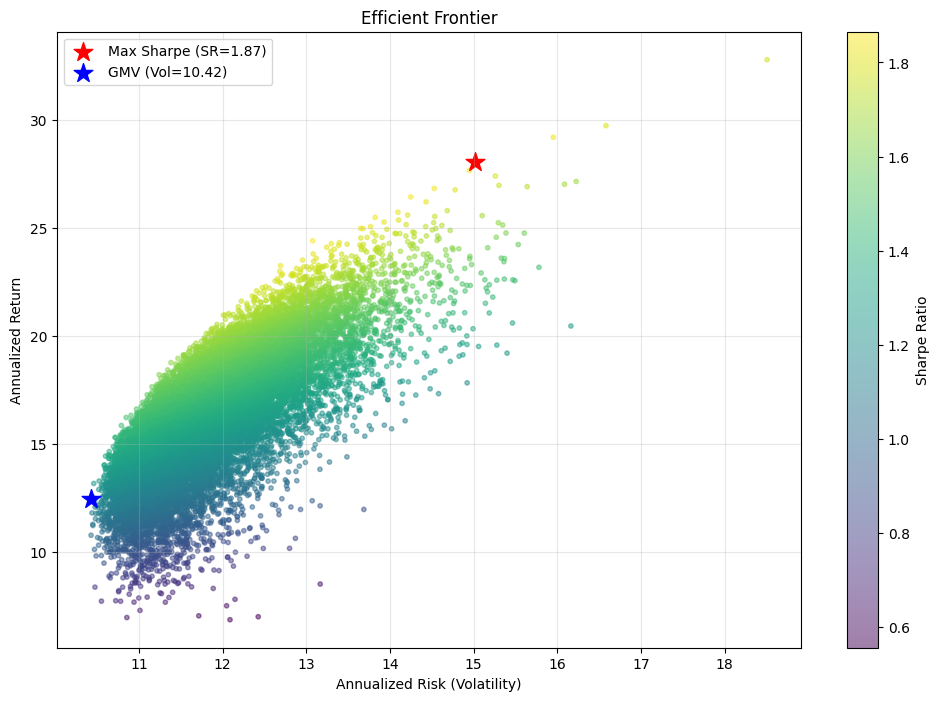

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(monte_carlo_data['Volatility'], monte_carlo_data['Return'], c = monte_carlo_data['Sharpe'], cmap='viridis', s=10, alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(portfolio['Volatility'], portfolio['Return'], c='red', s=200, marker='*', label=f'Max Sharpe (SR={portfolio["Sharpe"]:.2f})')
plt.scatter(gmv_port['Volatility'], gmv_port['Return'], c='blue', s=200, marker='*', label=f'GMV (Vol={gmv_port["Volatility"]:.2f})')
plt.title(f'Efficient Frontier')
plt.xlabel('Annualized Risk (Volatility)')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

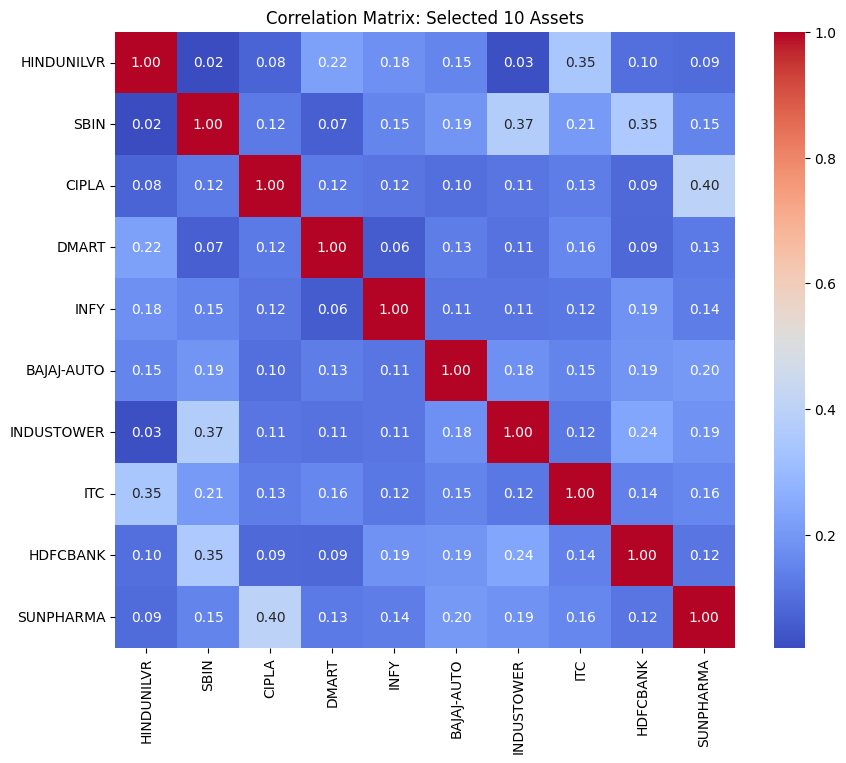

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Selected 10 Assets")
plt.show()

In [ ]:
weight_table = pd.DataFrame({
    'Stock': stocks_picked,
    'GMV Weight': gmv_weights,
    'Max Sharpe Weight': weights
})

print("FINAL WEIGHTS TABLE")
print(weight_table)

FINAL WEIGHTS TABLE
        Stock  GMV Weight  Max Sharpe Weight
0  HINDUNILVR    0.148304           0.039059
1        SBIN    0.084724           0.200218
2       CIPLA    0.063464           0.003602
3       DMART    0.068976           0.072162
4        INFY    0.083567           0.077779
5  BAJAJ-AUTO    0.056731           0.316555
6  INDUSTOWER    0.035858           0.184219
7         ITC    0.137786           0.002901
8    HDFCBANK    0.160882           0.041581
9   SUNPHARMA    0.159709           0.061922
